In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv("diabetes.csv")

Accuracy: 0.7676
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     64180
         1.0       0.03      0.03      0.03      1425
         2.0       0.29      0.32      0.30     10499

    accuracy                           0.77     76104
   macro avg       0.40      0.40      0.40     76104
weighted avg       0.78      0.77      0.77     76104



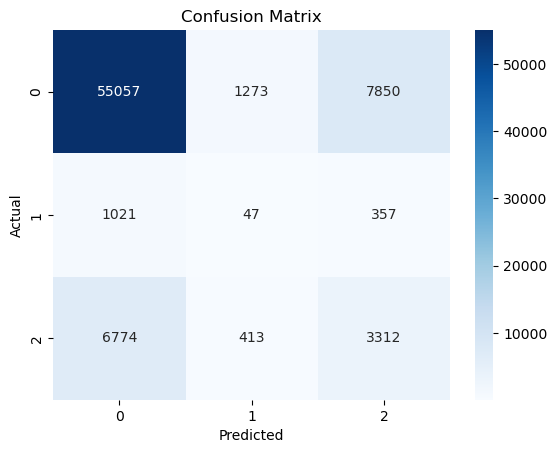

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('Diabetes_012', axis=1)  
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


<span style="font-size:32; color:blue"> Test avec la méthode "Downsample" </span>

In [5]:
from sklearn.utils import resample


df_majority = df[df['Diabetes_012'] == 0]
df_minority1 = df[df['Diabetes_012'] == 1]
df_minority2 = df[df['Diabetes_012'] == 2]


df_majority_downsampled = resample(df_majority, 
                                   replace=False,    
                                   n_samples=len(df_minority1), 
                                   random_state=42)  

df2 = pd.concat([df_majority_downsampled, df_minority1, df_minority2])

print(df2.Diabetes_012.value_counts())
print(df2.Diabetes_012.value_counts()/len(df2))

Diabetes_012
2.0    35346
0.0     4631
1.0     4631
Name: count, dtype: int64
Diabetes_012
2.0    0.792369
0.0    0.103815
1.0    0.103815
Name: count, dtype: float64


Accuracy: 0.7676
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     64180
         1.0       0.03      0.03      0.03      1425
         2.0       0.29      0.32      0.30     10499

    accuracy                           0.77     76104
   macro avg       0.40      0.40      0.40     76104
weighted avg       0.78      0.77      0.77     76104



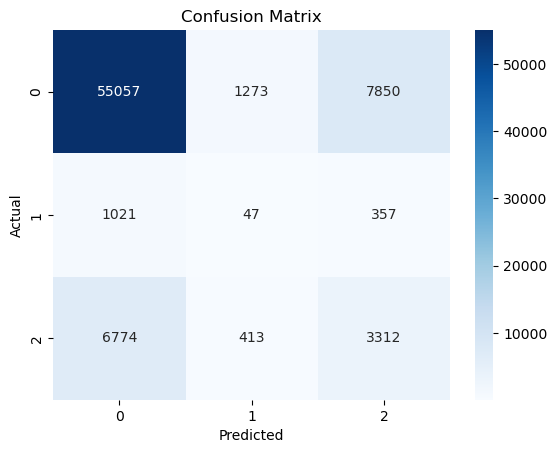

In [6]:

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<span style="font-size:32; color:blue"> Test avec la méthode "Upsample" </span>

In [7]:
df_majority = df[df['Diabetes_012'] == 0]
df_minority1 = df[df['Diabetes_012'] == 1]
df_minority2 = df[df['Diabetes_012'] == 2]

df_minority1_upsampled = resample(df_minority1, 
                                  replace=True,     # sample with replacement
                                  n_samples=len(df_majority), # Match majority class size
                                  random_state=42)


df_minority2_upsampled = resample(df_minority2, 
                                  replace=True, 
                                  n_samples=len(df_majority), 
                                  random_state=42)

df3 = pd.concat([df_majority, df_minority1_upsampled, df_minority2_upsampled])

print(df3.Diabetes_012.value_counts())
print(df3.Diabetes_012.value_counts()/len(df3))

Diabetes_012
0.0    213703
1.0    213703
2.0    213703
Name: count, dtype: int64
Diabetes_012
0.0    0.333333
1.0    0.333333
2.0    0.333333
Name: count, dtype: float64


Accuracy: 0.7676
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     64180
         1.0       0.03      0.03      0.03      1425
         2.0       0.29      0.32      0.30     10499

    accuracy                           0.77     76104
   macro avg       0.40      0.40      0.40     76104
weighted avg       0.78      0.77      0.77     76104



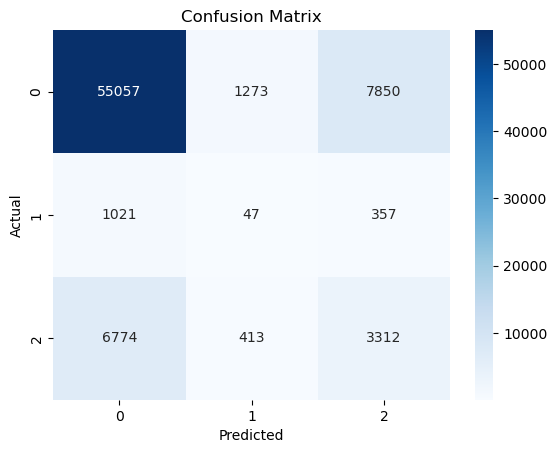

In [8]:

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<span style="font-size:32; color:blue"> Test avec la méthode "Class weight" </span>

Accuracy: 0.7663
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87     64180
         1.0       0.02      0.02      0.02      1425
         2.0       0.28      0.30      0.29     10499

    accuracy                           0.77     76104
   macro avg       0.39      0.40      0.39     76104
weighted avg       0.78      0.77      0.77     76104



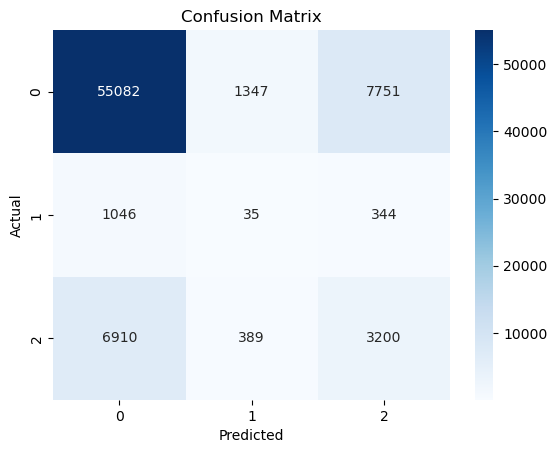

In [9]:
dt_classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<span style="font-size:32; color:blue"> Test avec la méthode SMOTE </span>

Diabetes_012
0.0    213703
2.0    213703
1.0    213703
Name: count, dtype: int64
Diabetes_012
0.0    0.333333
2.0    0.333333
1.0    0.333333
Name: count, dtype: float64
Accuracy: 0.8645
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     64020
         1.0       0.90      0.93      0.92     63955
         2.0       0.82      0.81      0.82     64358

    accuracy                           0.86    192333
   macro avg       0.86      0.86      0.86    192333
weighted avg       0.86      0.86      0.86    192333



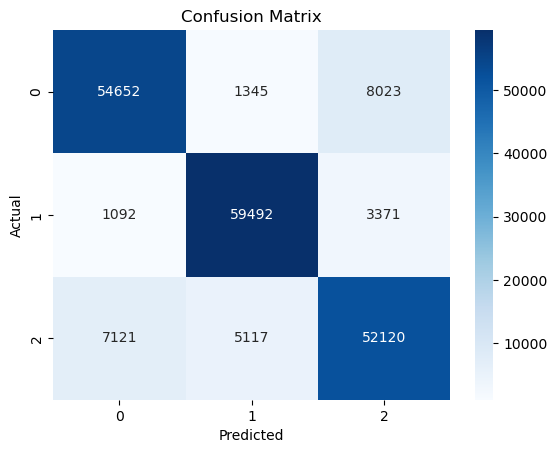

In [10]:
from imblearn.over_sampling import SMOTE

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print(y_smote.value_counts())
print(y_smote.value_counts()/len(y_smote))

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Random Forest Accuracy: 0.9107
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     64020
         1.0       0.95      0.96      0.95     63955
         2.0       0.92      0.83      0.87     64358

    accuracy                           0.91    192333
   macro avg       0.91      0.91      0.91    192333
weighted avg       0.91      0.91      0.91    192333



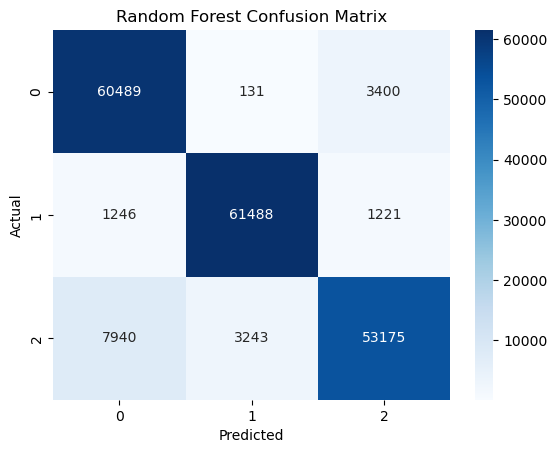

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')


print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

KNN Accuracy: 0.8572
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.61      0.75     64020
         1.0       0.87      1.00      0.93     63955
         2.0       0.79      0.96      0.87     64358

    accuracy                           0.86    192333
   macro avg       0.87      0.86      0.85    192333
weighted avg       0.87      0.86      0.85    192333



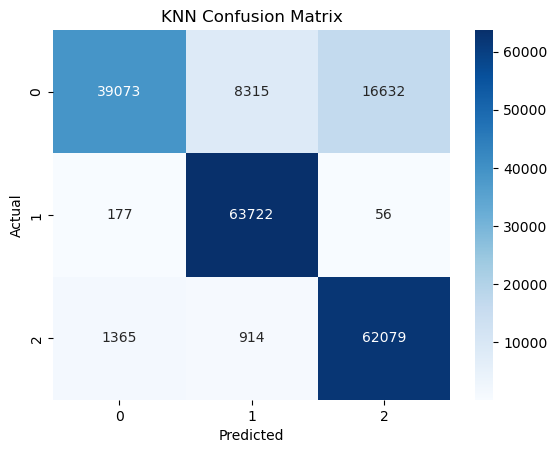

In [12]:
from sklearn.neighbors import KNeighborsClassifier


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.4f}')

print('KNN Classification Report:')
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()